In [153]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
%matplotlib inline

In [154]:
dqf = np.load('../../goesdata/DQF/098/OR_ABI-L1b-RadF-M6C07_G16_s20190980000.npy')

hf = h5py.File('/sharedData2/scratch/label/s20190980000.h5', 'r')
index = hf['label'][()]
data = hf['data'][()]

print(data.shape)
sum(index)

(401401, 4)


91236

In [161]:
dqf_sum = sum(sum(dqf))
sample_sum = sum(index)

In [163]:
np.count_nonzero(index)

52333

In [156]:
sample = np.array(index.reshape(1001,401))

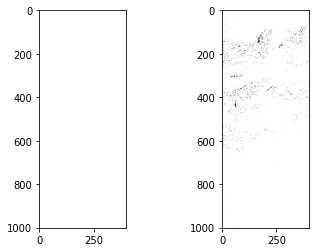

In [157]:
plt.subplot(121)
plt.imshow(dqf, cmap='Greys',  interpolation='nearest')
plt.subplot(122)
plt.imshow(sample, cmap='Greys',  interpolation='nearest')
#plt.savefig('blkwht.png')

plt.show()

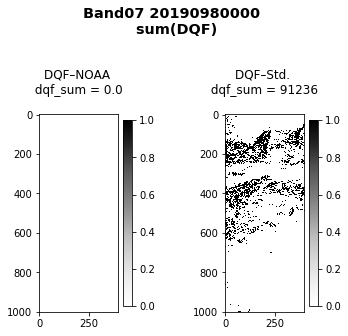

In [158]:
#adjusting min/max mapping values
fig, axs = plt.subplots(1, 2, figsize=(5, 6))
fig.subplots_adjust(wspace=1)
fig.suptitle("Band07 20190980000 \n sum(DQF)",fontsize="x-large", fontweight='bold')

img1 = axs[0].imshow(dqf,cmap='Greys', interpolation='none', vmin = 0, vmax=1)
axs[0].set_title(f'DQF–NOAA \n dqf_sum = {dqf_sum} \n')
fig.colorbar(img1, ax=axs[0], fraction=0.1)


img2 = axs[1].imshow(sample,cmap='Greys', interpolation='none', vmin = 0, vmax=1)
axs[1].set_title(f'DQF–Std. \n dqf_sum = {sample_sum} \n')
fig.colorbar(img2, ax=axs[1], fraction=0.1)

In [159]:
g16 = np.load('../../goesdata/spring_npy/098/OR_ABI-L1b-RadF-M6C07_G16_s20190980000')
g17 = np.load('../../goesdata/spring_npy/098/OR_ABI-L1b-RadF-M6C07_G17_s20190980000')

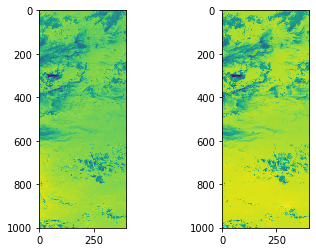

In [160]:
plt.subplot(121)
plt.imshow(g16,  interpolation='nearest')
plt.subplot(122)
plt.imshow(g17,  interpolation='nearest')
#plt.savefig('blkwht.png')

plt.show()

In [165]:
np.unique(sample)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])